In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/sleeptime_prediction_dataset.csv")

In [ ]:
#Classifiaction Task
import pandas as pd

# File path to the dataset (adjust it according to your system)
file_path = r"/content/drive/MyDrive/sleeptime_prediction_dataset.csv"

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataset to verify it's loaded correctly
df.head()

WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50

In [ ]:
#Conducting Exploratory Data Analysis (EDA):
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = r"/content/drive/MyDrive/sleeptime_prediction_dataset.csv"
df = pd.read_csv(file_path)

# Step 3: Inspect the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Step 4: Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

# Step 5: Check for duplicate rows
print("\nDuplicate Rows in the Dataset:")
print(df.duplicated().sum())

# Step 6: Data Cleaning - Drop rows with missing values (or choose to fill them)
df_cleaned = df.dropna()  # You can alternatively fill missing values with df.fillna() if desired


First 5 rows of the dataset:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  

Missing Values in the Dataset:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

Duplicate Rows in the Dataset:
0


<Figure size 1500x1000 with 0 Axes>

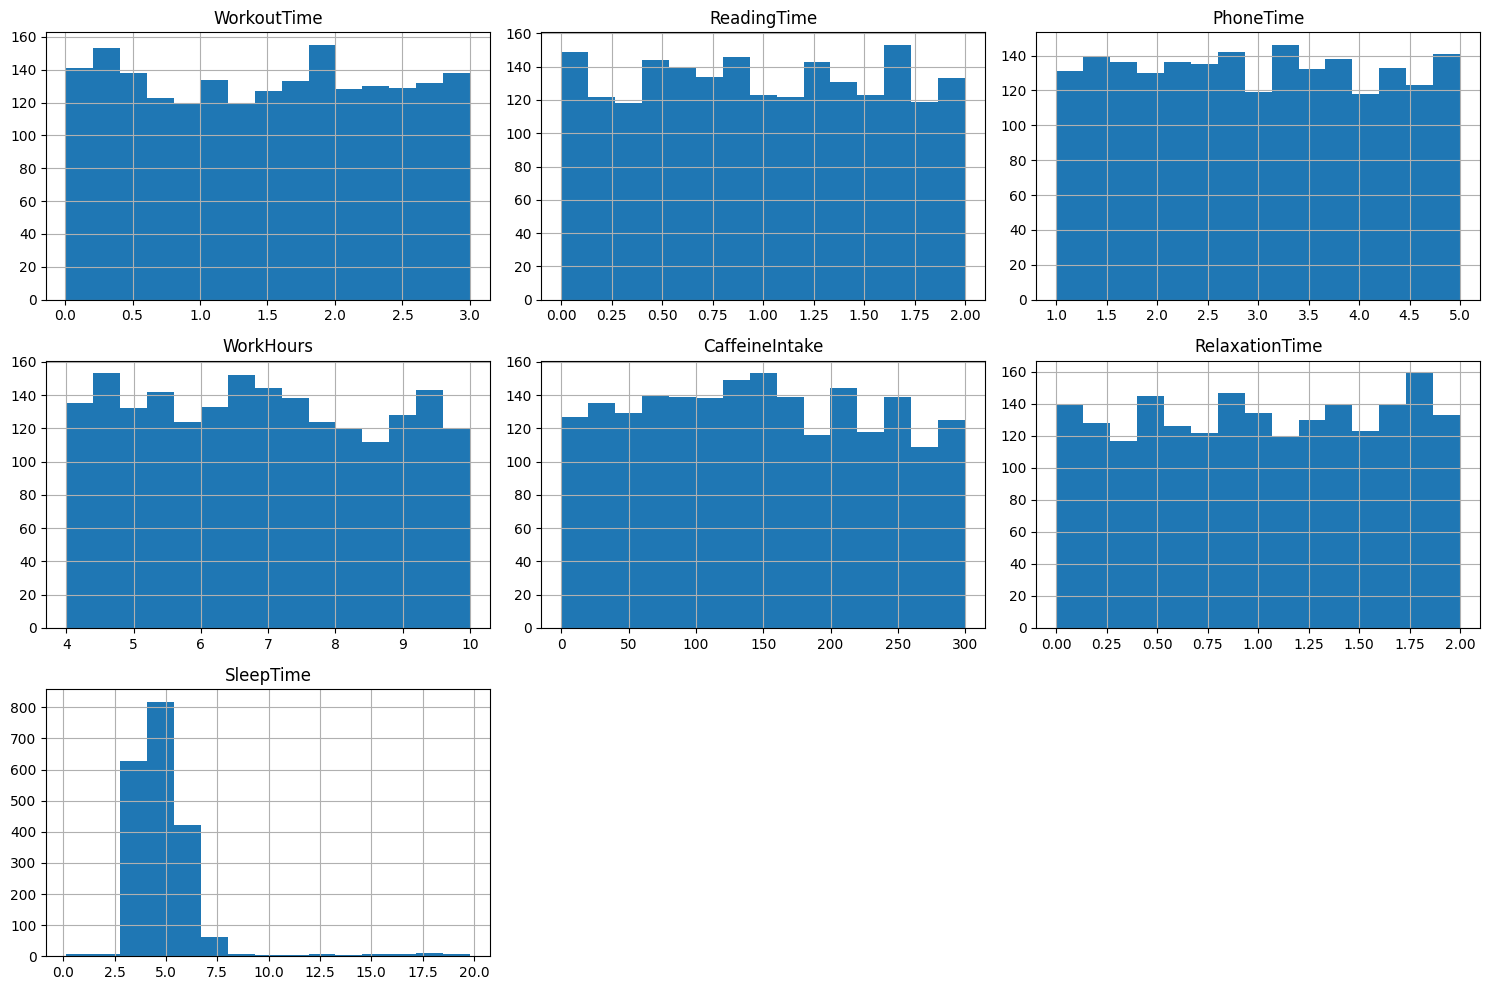

In [ ]:
# Step 8: Visualize the distribution of numerical features using histograms
plt.figure(figsize=(15, 10))
df_cleaned.hist(bins=15, figsize=(15, 10), layout=(3, 3))  # Adjust layout if necessary
plt.tight_layout()
plt.show()

In [ ]:
# Step 9: Summary Statistics - Compute and display summary statistics
print("\nSummary Statistics for Numerical Columns:")
print(df_cleaned.describe())


Summary Statistics for Numerical Columns:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  
count     2000.000000  2000.000000  
mean         1.010955     4.884375  
std          0.582619     2.028892  
min          0.000000     0.150000  
25%          0.510000     3.840000  
50%          1.010000     4.600000  
75% 

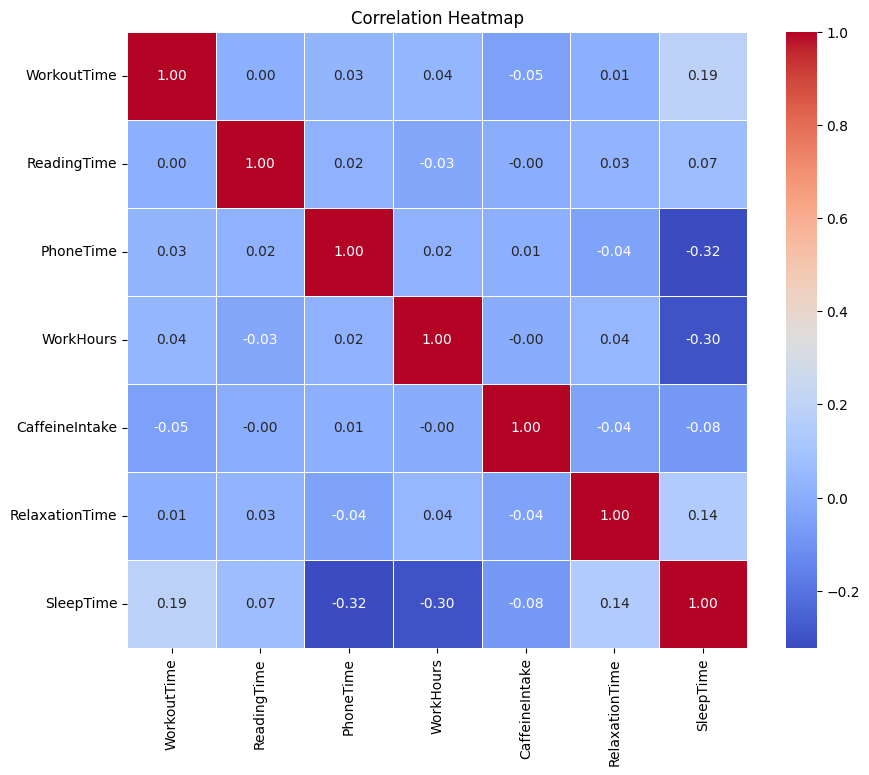

In [ ]:
# Step 10: Visualize the correlation between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


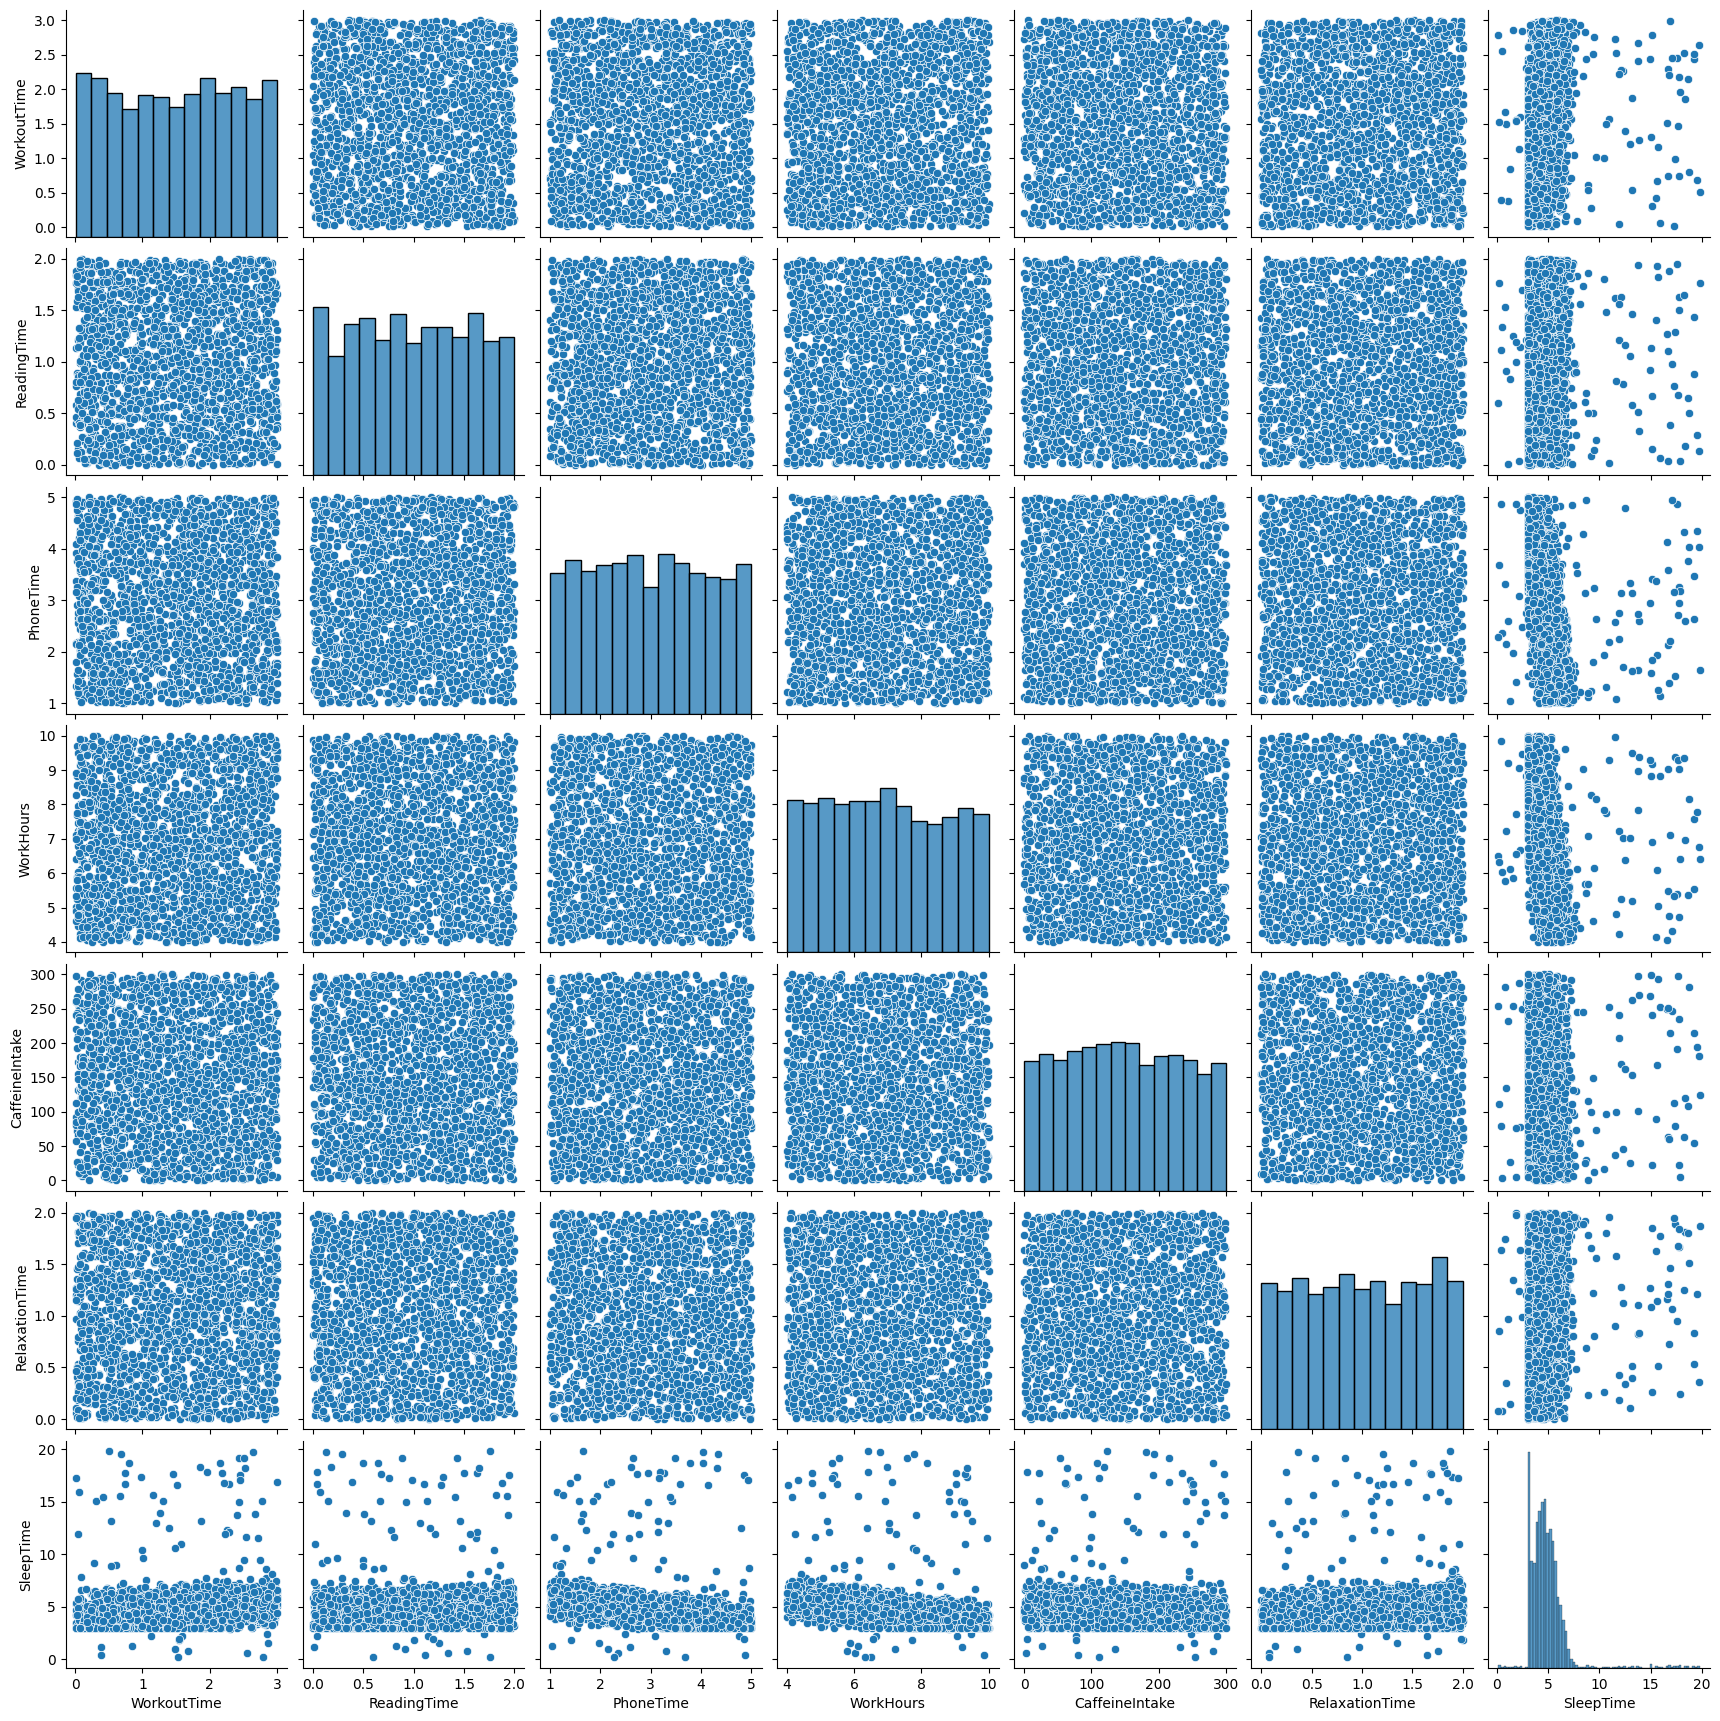

In [ ]:
# Step 11: Visualize pairwise relationships between features using pairplot
sns.pairplot(df_cleaned)
plt.show()



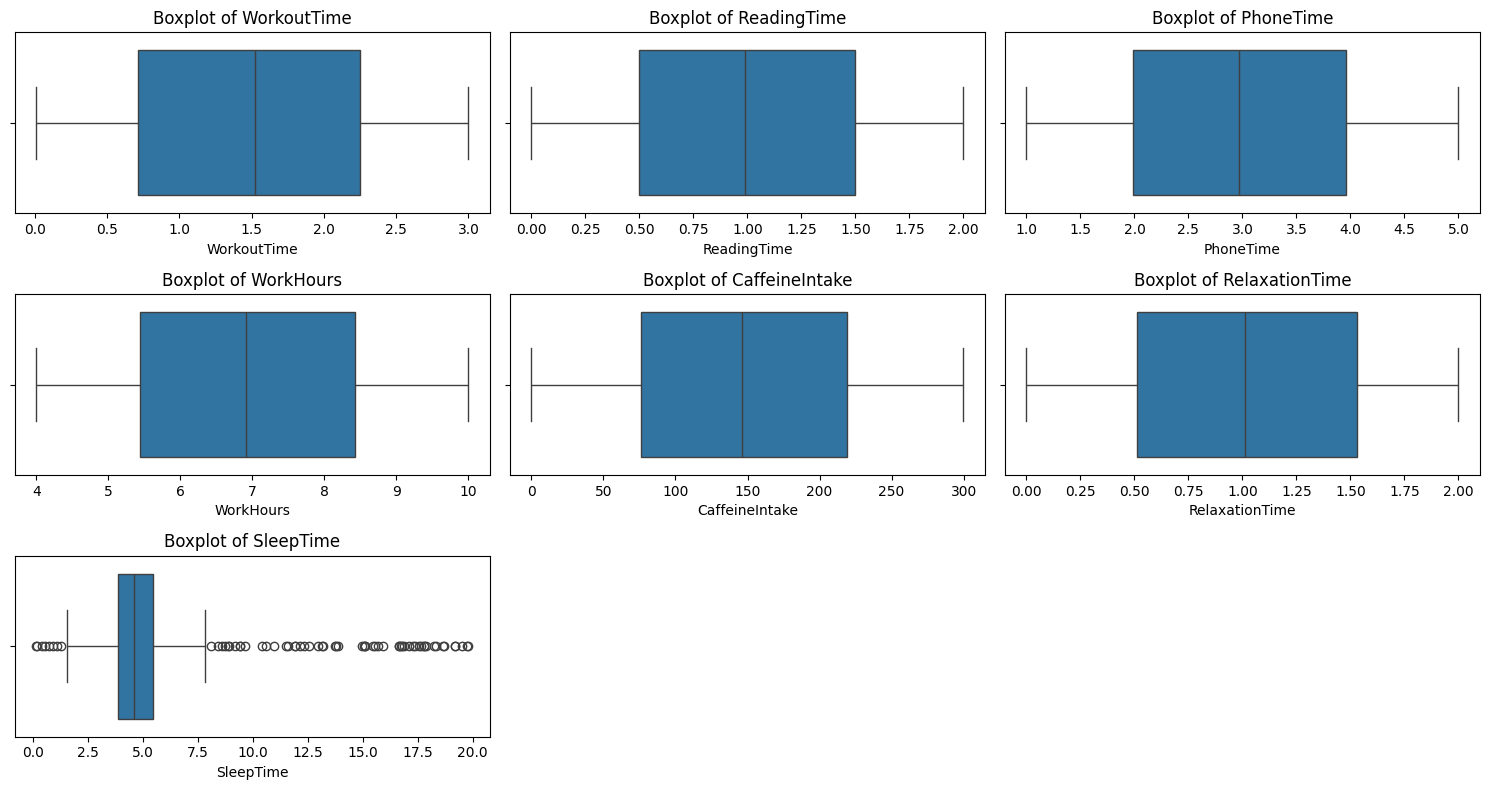

In [ ]:
# Step 12: Detect outliers using box plots
plt.figure(figsize=(15, 8))
for i, column in enumerate(df_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)  # Adjust based on the number of features
    sns.boxplot(x=df_cleaned[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [ ]:
# Step 13: Visualize the distribution of categorical variables
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_cleaned, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()

# Step 14: Save the cleaned dataset (optional)
cleaned_file_path = r"/content/drive/MyDrive/sleeptime_prediction_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /content/drive/MyDrive/sleeptime_prediction_dataset.csv


In [ ]:
#Question 2: EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset with correct path formatting
dataset_path = r"/content/drive/MyDrive/sleeptime_prediction_dataset.csv"  # FIXED
df = pd.read_csv(dataset_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB
None


In [ ]:
# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(df.head())



First 5 rows:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


In [ ]:
# Handling missing values (if any)
df = df.dropna()  # Drop rows with missing values

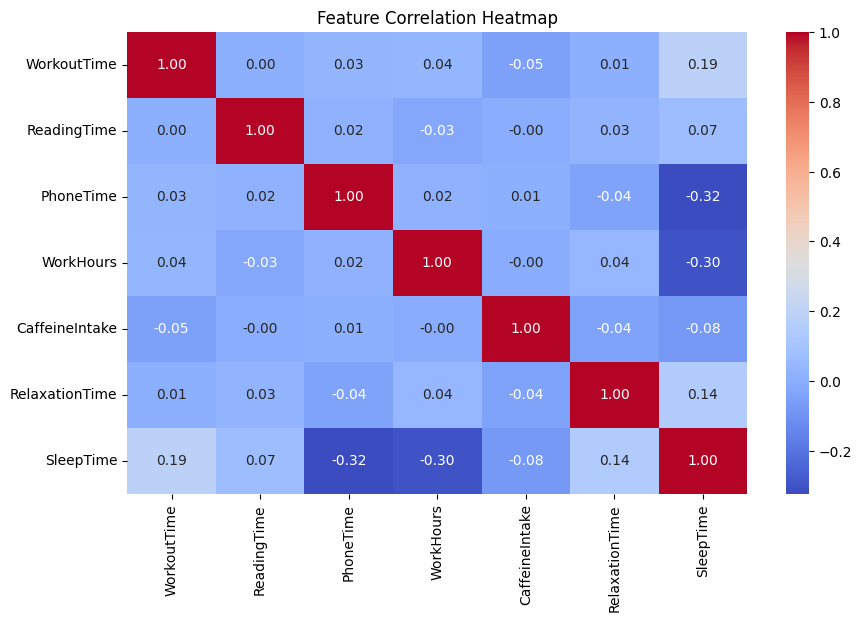

In [ ]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

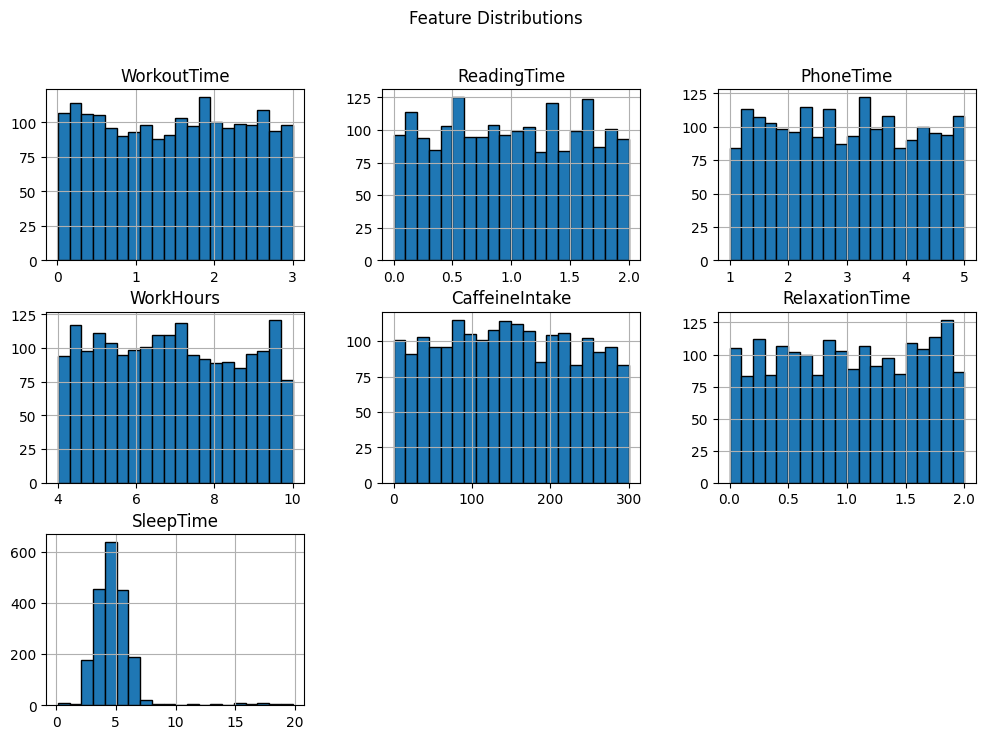


Summary Statistics:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  
count     2000.000000  2000.000000  
mean         1.010955     4.884375  
std          0.582619     2.028892  
min          0.000000     0.150000  
25%          0.510000     3.840000  
50%          1.010000     4.600000  
75%          1.530000     

In [ ]:
# Histogram for numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

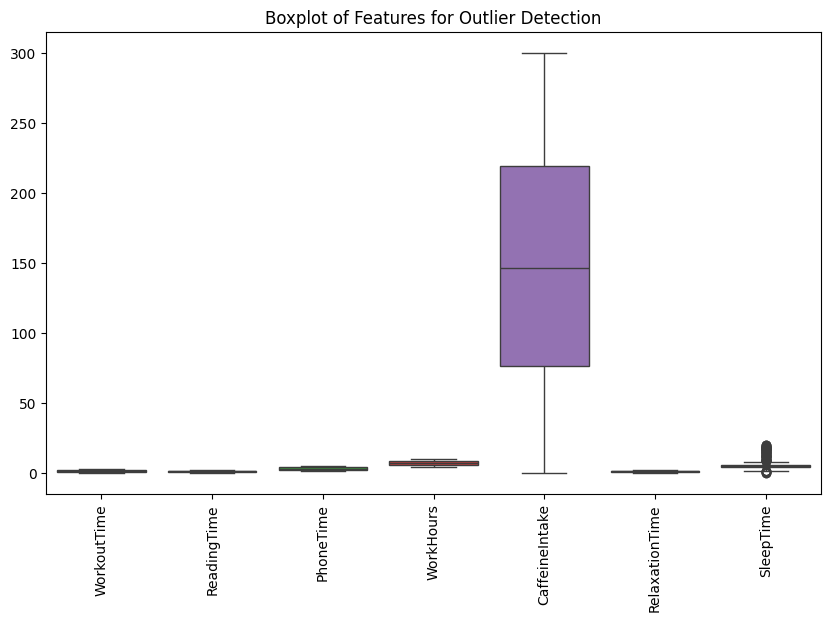

In [ ]:
# Box plots for outlier detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features for Outlier Detection")
plt.show()


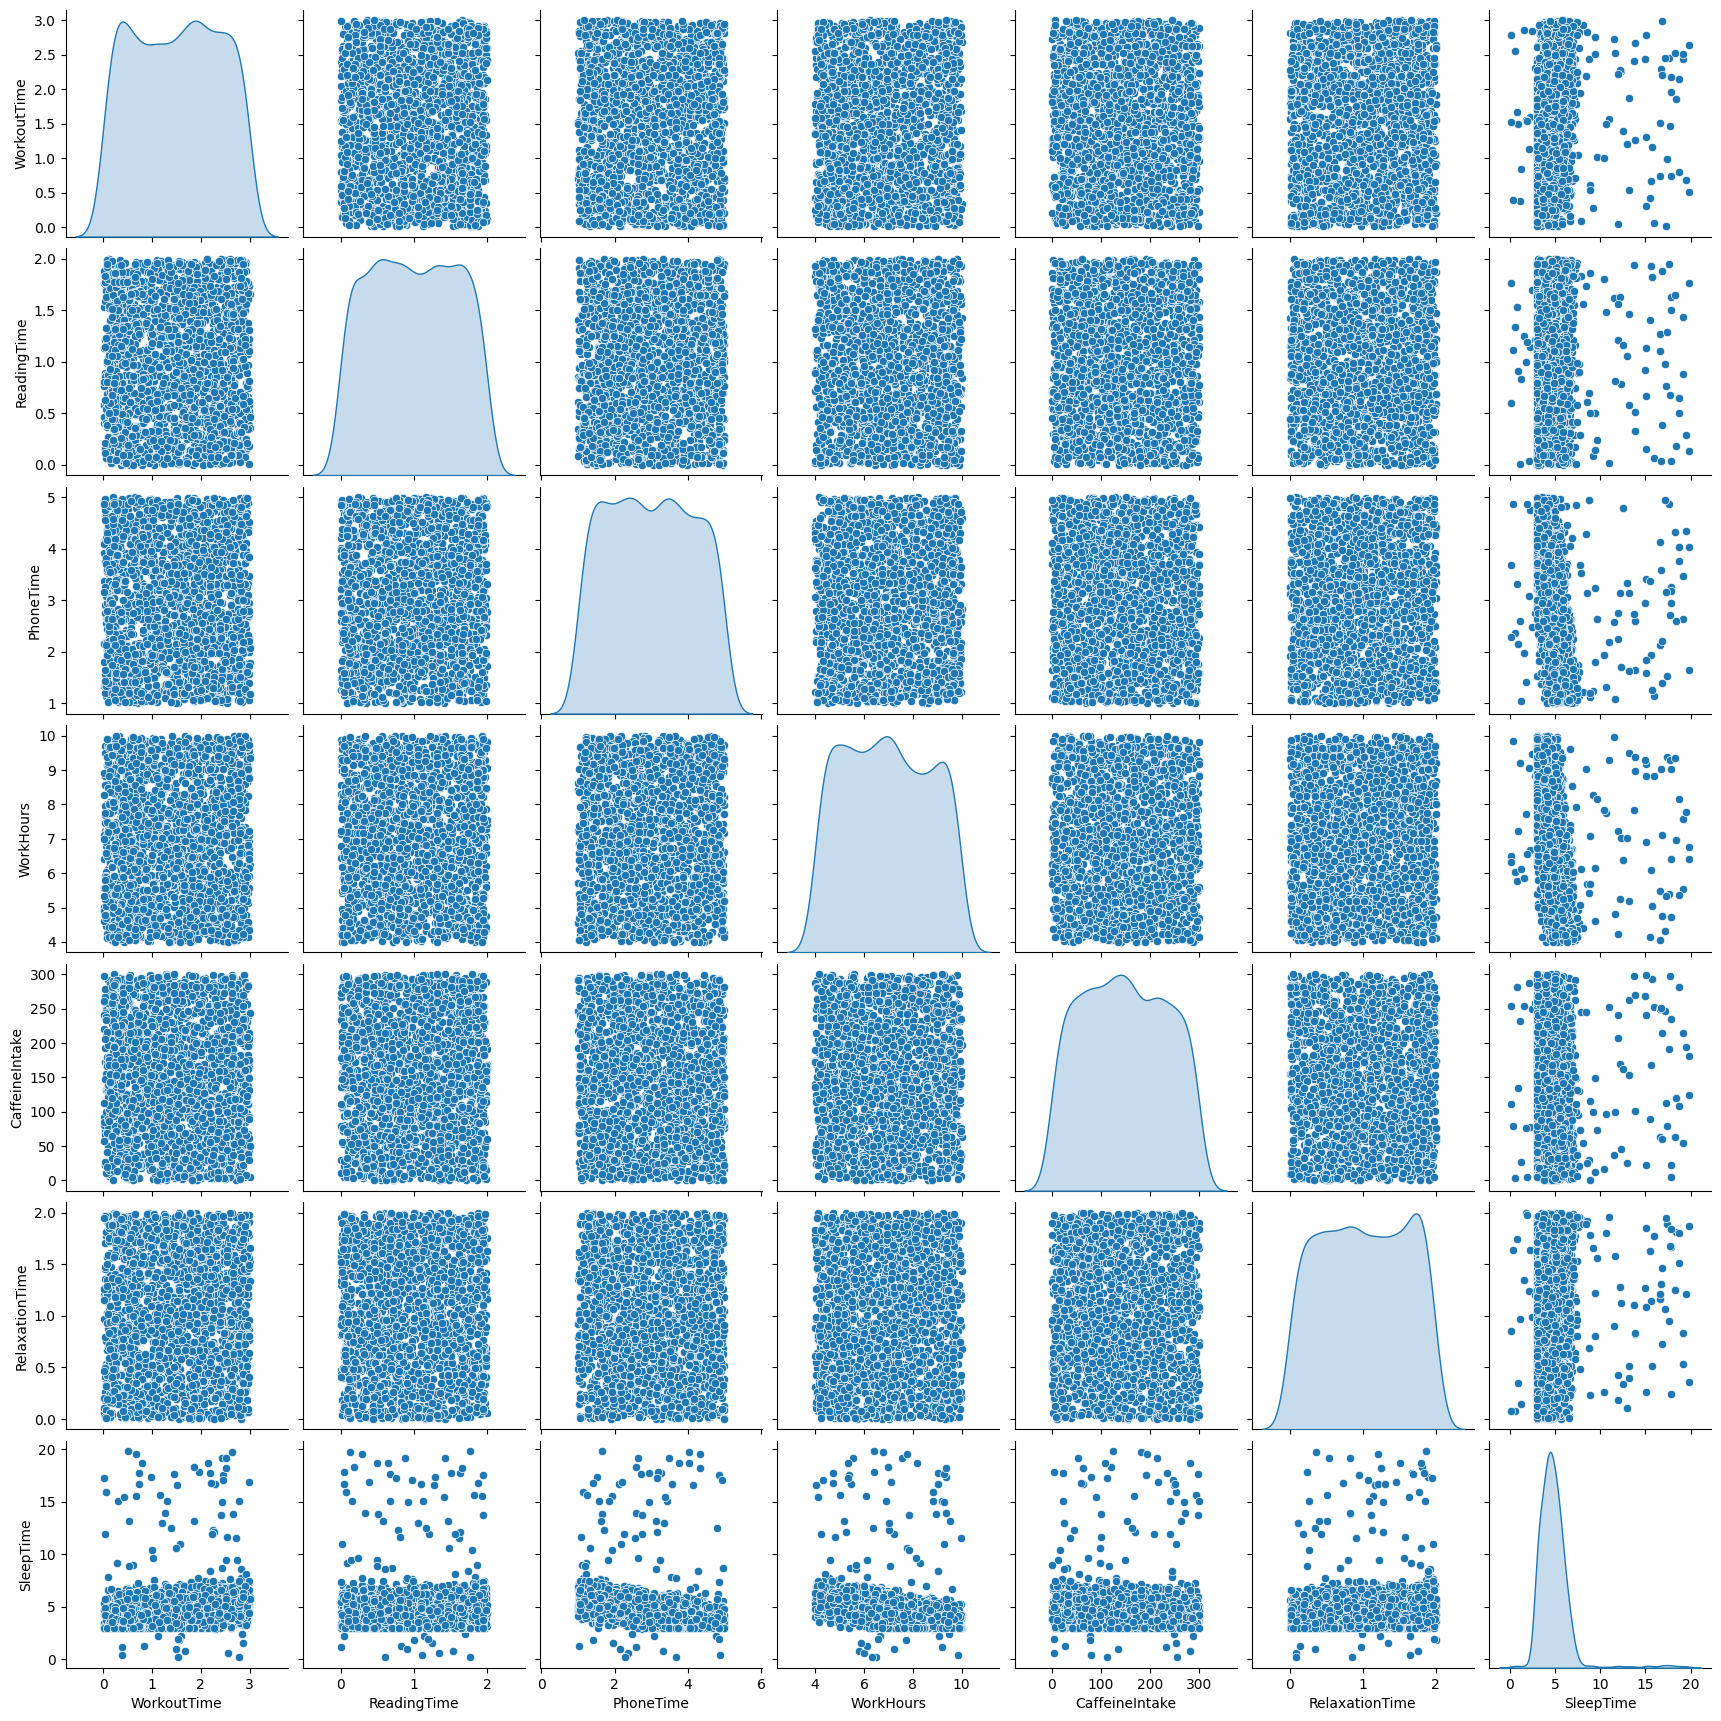

In [ ]:
# Scatter plot of two relevant numerical features
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Insights summary
print("\nInsights:")
print(f"1. The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print("2. No missing values after cleaning.")
print("3. The correlation heatmap shows relationships between features.")
print("4. Box plots highlight potential outliers.")
print("5. Scatter plots reveal trends or clusters in the data.")


Insights:
1. The dataset has 2000 rows and 7 columns.
2. No missing values after cleaning.
3. The correlation heatmap shows relationships between features.
4. Box plots highlight potential outliers.
5. Scatter plots reveal trends or clusters in the data.


In [ ]:
#Build a Model from Scratch [5]:#classification Task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Update the path to your dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Updated path
df = pd.read_csv(dataset_path)

# Print column names to find the target column
print("Column names in dataset:", df.columns)

# Set the correct target column
target_column = 'SleepTime'  # The correct column from the available columns

# Now check if the target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Splitting dataset into features and labels
y = df[target_column]
X = df.drop(columns=[target_column])

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model (from scratch)
class LinearRegressionModel:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            # Predicting the target variable
            linear_model = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (linear_model - y))
            db = (1 / n_samples) * np.sum(linear_model - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train linear regression model
model = LinearRegressionModel(lr=0.01, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Mean Squared Error: {mse:.4f}")
print(f"Model R-squared: {r2:.4f}")


Column names in dataset: Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')
Model Mean Squared Error: 4.4979
Model R-squared: 0.2055


In [ ]:
#Build a Primary Model [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Load the dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# Print column names to find the target column
print("Column names in dataset:", df.columns)

# Set the correct target column (based on your dataset)
target_column = 'SleepTime'

# Now check if the target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in dataset. Available columns: {df.columns}")

# Step 2: Preprocessing the data
# Splitting dataset into features (X) and labels (y)
y = df[target_column]
X = df.drop(columns=[target_column])

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 4: Build the Linear Regression Model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
y_pred_linreg = linreg_model.predict(X_test)

# Step 5: Build the Random Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate both models on the test dataset
# Linear Regression Evaluation
linreg_mae = mean_absolute_error(y_test, y_pred_linreg)
linreg_mse = mean_squared_error(y_test, y_pred_linreg)
linreg_r2 = r2_score(y_test, y_pred_linreg)




Column names in dataset: Index(['WorkoutTime', 'ReadingTime', 'PhoneTime', 'WorkHours',
       'CaffeineIntake', 'RelaxationTime', 'SleepTime'],
      dtype='object')


In [ ]:
# Step 7: Print Evaluation Metrics for both models
print("Linear Regression - Mean Absolute Error: {:.4f}".format(linreg_mae))
print("Linear Regression - Mean Squared Error: {:.4f}".format(linreg_mse))
print("Linear Regression - R2 Score: {:.4f}".format(linreg_r2))


Linear Regression - Mean Absolute Error: 0.6394
Linear Regression - Mean Squared Error: 4.4978
Linear Regression - R2 Score: 0.2055


In [ ]:

from sklearn.ensemble import RandomForestRegressor
# Prepare data for training
X = df.drop(columns=['SleepTime'])  # 'SleepTime' is the actual target column name
y = df['SleepTime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
rf_predictions = rf.predict(X_test)

# Compute evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Print evaluation metrics
print("\nRandom Forest Regressor - Mean Absolute Error: {:.4f}".format(rf_mae))
print("Random Forest Regressor - Mean Squared Error: {:.4f}".format(rf_mse))
print("Random Forest Regressor - R2 Score: {:.4f}".format(rf_r2))



Random Forest Regressor - Mean Absolute Error: 0.7918
Random Forest Regressor - Mean Squared Error: 5.0207
Random Forest Regressor - R2 Score: 0.1132


In [ ]:
 #Step 8: Conclude by identifying the best performing model
if linreg_r2 > rf_r2:
    print("\nLinear Regression performed better based on R2 score.")
else:
    print("\nRandom Forest Regressor performed better based on R2 score.")



Linear Regression performed better based on R2 score.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Load dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Updated path
df = pd.read_csv(dataset_path)

# Set target column and features
target_column = 'SleepTime'
y = df[target_column]
X = df.drop(columns=[target_column])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linreg_model = LinearRegression()

# Hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
}

# Apply GridSearchCV for hyperparameter optimization
grid_search = GridSearchCV(estimator=linreg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params_linreg = grid_search.best_params_
print("Best hyperparameters for Linear Regression:", best_params_linreg)


Best hyperparameters for Linear Regression: {'fit_intercept': True}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Load dataset safely
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Please check the path.")

df = pd.read_csv(dataset_path)

# Check for missing values
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values. Filling with median values.")
    df.fillna(df.median(), inplace=True)  # Fill missing values with median

# Set target column and features
target_column = 'SleepTime'

if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

y = df[target_column]
X = df.drop(columns=[target_column])

# Ensure only numeric data is used
X = X.select_dtypes(include=['number'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameters to tune (Fixed the 'max_features' issue)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Apply GridSearchCV for hyperparameter optimization
grid_search_rf = GridSearchCV(
    estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=2, error_score='raise', n_jobs=-1
)

try:
    grid_search_rf.fit(X_train, y_train)
    # Get the best hyperparameters
    best_params_rf = grid_search_rf.best_params_
    print("Best hyperparameters for Random Forest Regressor:", best_params_rf)
except Exception as e:
    print("Error during GridSearchCV:", e)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters for Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Hyper-parameter Optimization with Cross-Validation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

#  Step 1: Load Dataset and Identify Hyperparameters
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Please check the path.")

df = pd.read_csv(dataset_path)

# Handle missing values
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values. Filling with median values.")
    df.fillna(df.median(), inplace=True)

# Define target and features
target_column = 'SleepTime'
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset.")

y = df[target_column]
X = df.drop(columns=[target_column])

# Ensure only numeric data is used
X = X.select_dtypes(include=['number'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Step 2: Apply Cross-Validation to Tune Hyperparameters
#  Hyperparameter tuning for Linear Regression
linreg = LinearRegression()
param_grid_linreg = {
    'fit_intercept': [True, False]
}
grid_search_linreg = GridSearchCV(estimator=linreg, param_grid=param_grid_linreg, cv=5, verbose=2, n_jobs=-1)
grid_search_linreg.fit(X_train, y_train)
best_params_linreg = grid_search_linreg.best_params_

#  Hyperparameter tuning for Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, verbose=2, error_score='raise', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_

#  Step 3: Print the Best Hyperparameters
print("\n✅ Best Hyperparameters Found:")
print("Best hyperparameters for Linear Regression:", best_params_linreg)
print("Best hyperparameters for Random Forest Regressor:", best_params_rf)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

✅ Best Hyperparameters Found:
Best hyperparameters for Linear Regression: {'fit_intercept': True}
Best hyperparameters for Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#  Step 3: Print the Best Hyperparameters
print("\n✅ Best Hyperparameters Found:")
print("Best hyperparameters for Linear Regression:", best_params_linreg)
print("Best hyperparameters for Random Forest Regressor:", best_params_rf)




✅ Best Hyperparameters Found:
Best hyperparameters for Linear Regression: {'fit_intercept': True}
Best hyperparameters for Random Forest Regressor: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#5. Feature Selection
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Step 1: Load Dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Update with the correct path
df = pd.read_csv(dataset_path)

# Handle missing values
df.fillna(df.median(), inplace=True)

# Define target and features
target_column = 'SleepTime'
y = df[target_column]
X = df.drop(columns=[target_column])

# Ensure only numeric data is used
X = X.select_dtypes(include=['number'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Step 2: Apply Mutual Information for Feature Selection
mi_scores = mutual_info_regression(X_scaled, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns)

# Sort features by importance
mi_scores = mi_scores.sort_values(ascending=False)
print("\n🔍 Mutual Information Scores:")
print(mi_scores)

# 📌 Step 3: Select Top Features
top_features = mi_scores[mi_scores > 0.01].index  # Adjust threshold as needed
X_selected = X[top_features]

print("\n✅ Selected Features:")
print(list(top_features))

# 📌 Step 4: Split Data with Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Now, you can use X_train and X_test for your models!



🔍 Mutual Information Scores:
WorkHours         0.202745
PhoneTime         0.197092
WorkoutTime       0.043733
ReadingTime       0.020880
RelaxationTime    0.015356
CaffeineIntake    0.000000
dtype: float64

✅ Selected Features:
['WorkHours', 'PhoneTime', 'WorkoutTime', 'ReadingTime', 'RelaxationTime']


In [ ]:
#Final Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 📌 Load and Preprocess Dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Ensure the path is correct
df = pd.read_csv(dataset_path)

# Check for missing values and fill them
df.fillna(df.median(), inplace=True)

# Set target and features
target_column = 'SleepTime'
y = df[target_column]
X = df.drop(columns=[target_column])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📌 Task 5: Apply Mutual Information for Feature Selection (from Task 5)
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_scaled, y)
mi_scores = pd.Series(mi_scores, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Select top features (threshold can be adjusted based on the scores)
top_features = mi_scores[mi_scores > 0.01].index
X_selected = X[top_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 📌 Task 4: Rebuild the models with the best hyperparameters

# Linear Regression Hyperparameters (from Task 4)
best_params_linreg = {'fit_intercept': True}  # Remove 'normalize' parameter as it's not used anymore
linreg = LinearRegression(**best_params_linreg)
linreg.fit(X_train, y_train)

# Random Forest Regressor Hyperparameters (from Task 4)
best_params_rf = {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
rf_model = RandomForestRegressor(**best_params_rf)
rf_model.fit(X_train, y_train)

# 📌 Evaluate Performance: Linear Regression
y_pred_linreg = linreg.predict(X_test)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

# 📌 Evaluate Performance: Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 📌 Display Evaluation Results
print("\nPerformance Evaluation:")

# Linear Regression Evaluation
print("Linear Regression - MSE:", mse_linreg)
print("Linear Regression - R²:", r2_linreg)

# Random Forest Regressor Evaluation
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R²:", r2_rf)



Performance Evaluation:
Linear Regression - MSE: 4.5047595753980785
Linear Regression - R²: 0.20431434893834655
Random Forest - MSE: 4.687302302962383
Random Forest - R²: 0.17207142307348755


In [ ]:
#For Regression Task
import pandas as pd

# Load the dataset into a DataFrame
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Path to your dataset
df = pd.read_csv(dataset_path)


In [ ]:
# Display the first few rows of the dataset to understand its structure
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  


In [ ]:
# Check for basic info and data types
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB
None


In [ ]:
# Summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  
count     2000.000000  2000.000000  
mean         1.010955     4.884375  
std          0.582619     2.028892  
min          0.000000     0.150000  
25%          0.510000     3.840000  
50%          1.010000     4.600000  
75%          1.530000     

In [ ]:
# Check for any missing values in the dataset
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())


Missing Values in the Dataset:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


In [ ]:
#Exploratory Data Analysis and Data Understanding
import pandas as pd

# Load the dataset into a DataFrame
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'
df = pd.read_csv(dataset_path)

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in the Dataset:")
print(missing_values)



Missing Values in the Dataset:
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64


In [ ]:
# 2. Handle missing values (Example: Impute missing values or drop rows/columns)
# For simplicity, we will drop rows with missing values
df_cleaned = df.dropna()
# 3. Check for duplicate rows
duplicates = df_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 0


In [ ]:
# 4. Summary statistics for numerical columns
summary_stats = df_cleaned.describe()
print("\nSummary Statistics for Numerical Columns:")
print(summary_stats)


Summary Statistics for Numerical Columns:
       WorkoutTime  ReadingTime    PhoneTime    WorkHours  CaffeineIntake  \
count  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000   
mean      1.495915     0.992785     2.985195     6.926945      147.493780   
std       0.876639     0.577303     1.151776     1.723843       84.651139   
min       0.010000     0.000000     1.000000     4.000000        0.020000   
25%       0.710000     0.500000     1.990000     5.440000       75.980000   
50%       1.520000     0.990000     2.965000     6.910000      146.010000   
75%       2.250000     1.500000     3.960000     8.422500      218.902500   
max       3.000000     2.000000     5.000000    10.000000      299.850000   

       RelaxationTime    SleepTime  
count     2000.000000  2000.000000  
mean         1.010955     4.884375  
std          0.582619     2.028892  
min          0.000000     0.150000  
25%          0.510000     3.840000  
50%          1.010000     4.600000  
75% 

In [ ]:
# 5. Info on data types and non-null counts
data_info = df_cleaned.info()
print("\nDataset Info:")
print(data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   WorkoutTime     2000 non-null   float64
 1   ReadingTime     2000 non-null   float64
 2   PhoneTime       2000 non-null   float64
 3   WorkHours       2000 non-null   float64
 4   CaffeineIntake  2000 non-null   float64
 5   RelaxationTime  2000 non-null   float64
 6   SleepTime       2000 non-null   float64
dtypes: float64(7)
memory usage: 109.5 KB

Dataset Info:
None


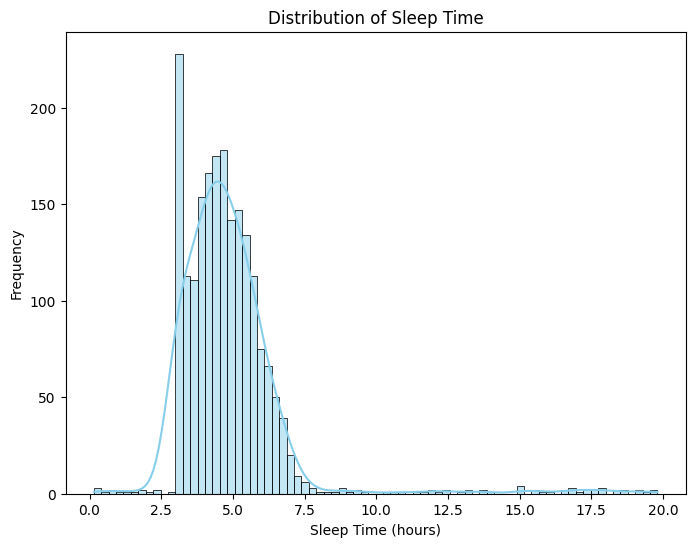

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Distribution of SleepTime (Target Variable)
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['SleepTime'], kde=True, color='skyblue')
plt.title('Distribution of Sleep Time')
plt.xlabel('Sleep Time (hours)')
plt.ylabel('Frequency')
plt.show()

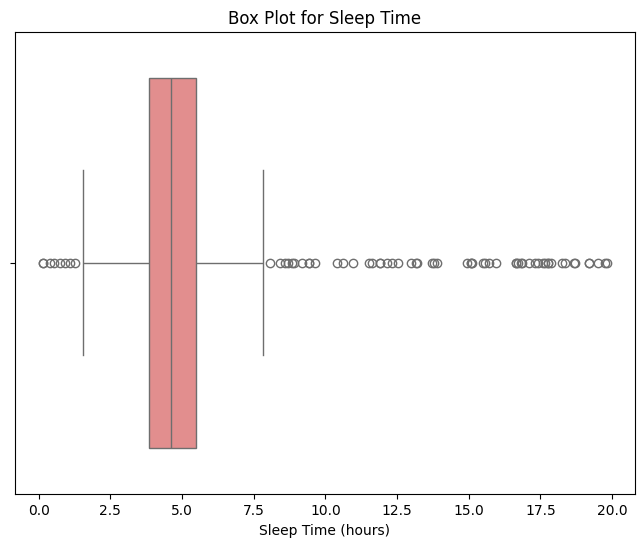

In [ ]:
# 2. Box Plot to check for outliers in SleepTime
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['SleepTime'], color='lightcoral')
plt.title('Box Plot for Sleep Time')
plt.xlabel('Sleep Time (hours)')
plt.show()

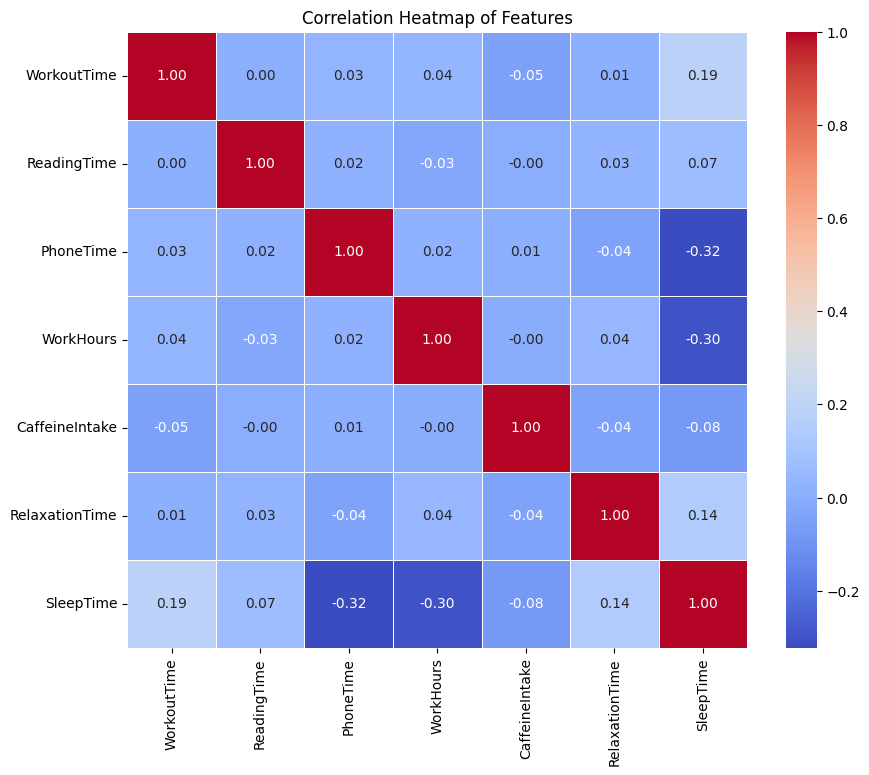

In [ ]:
# 3. Correlation Heatmap to explore relationships between features
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

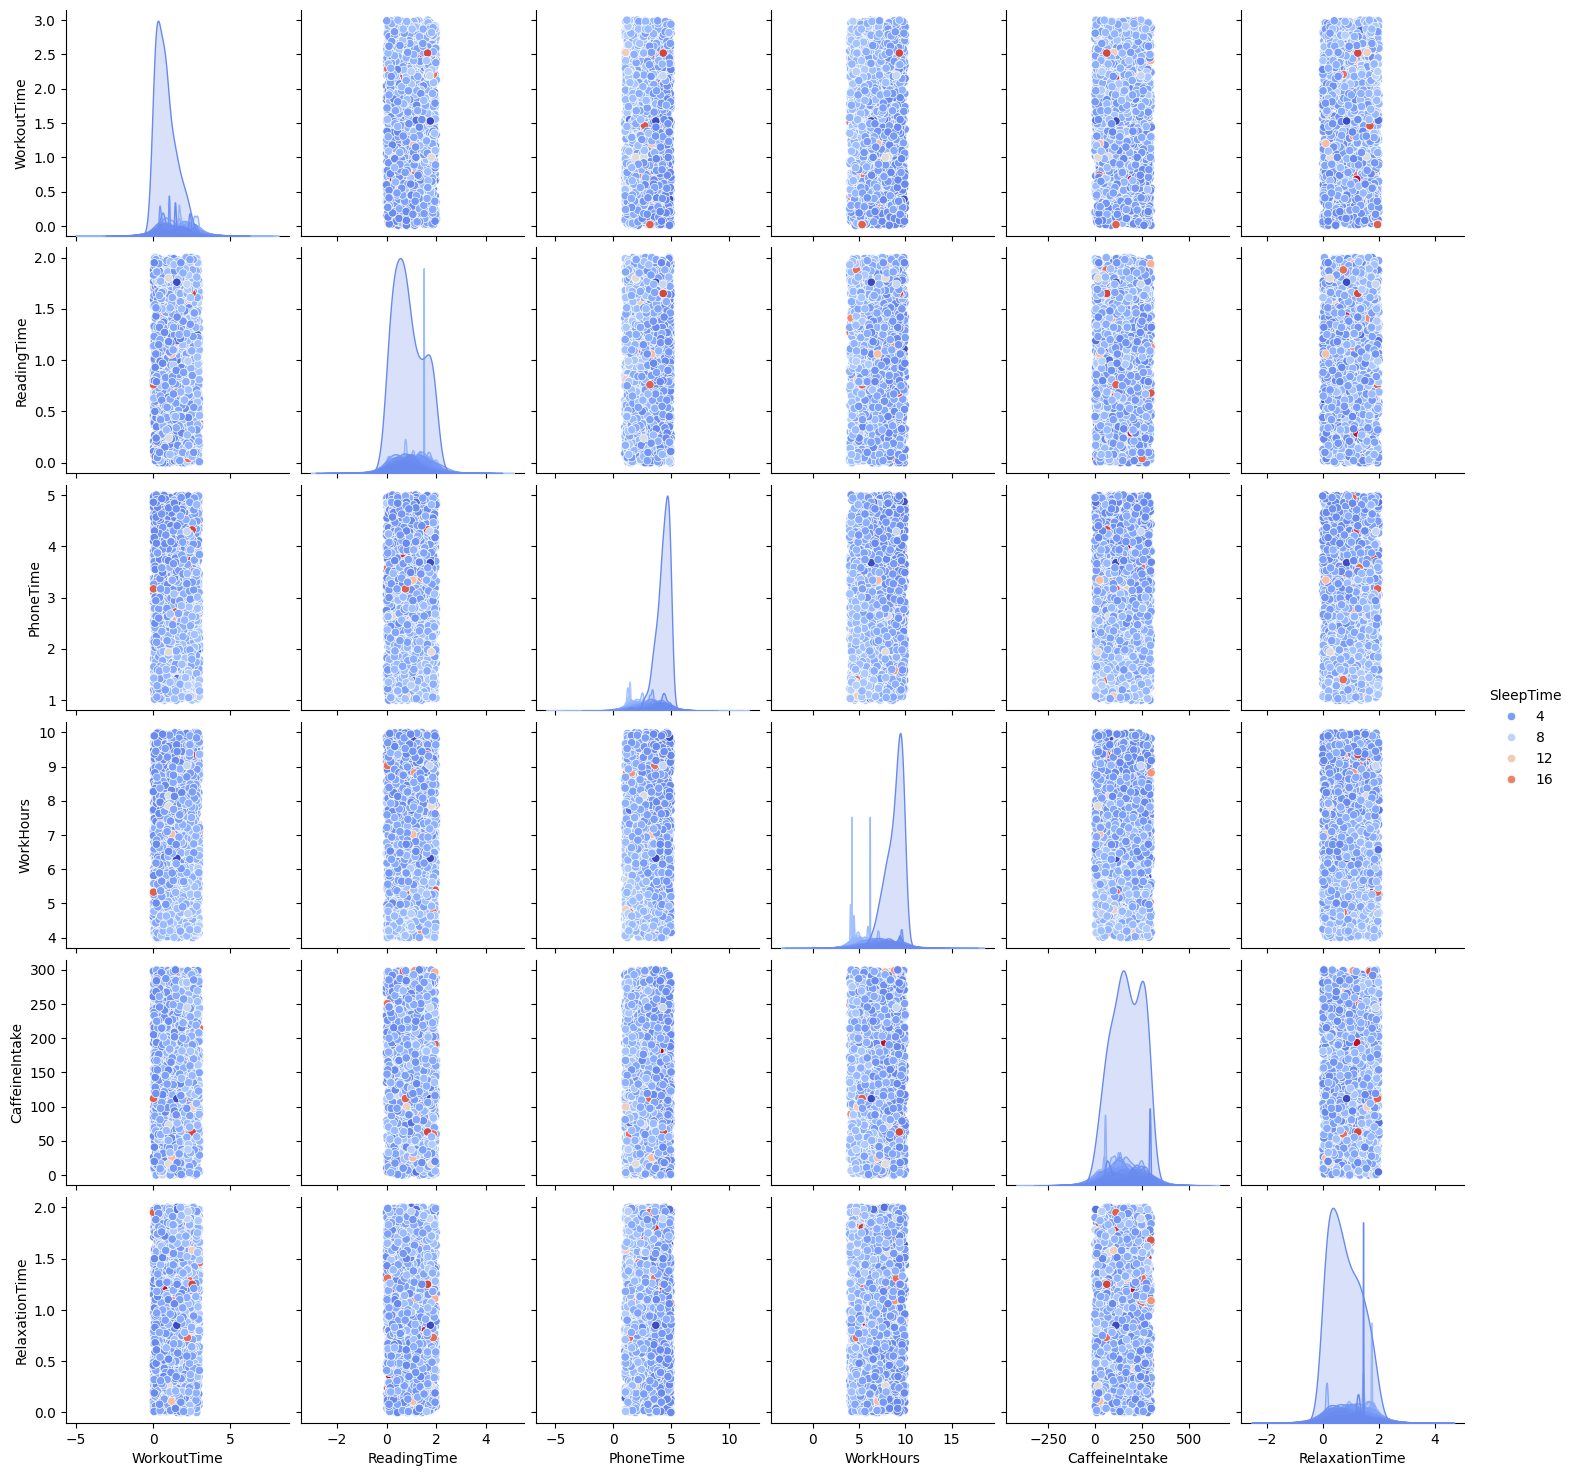

In [ ]:
# 4. Pairplot to explore pairwise relationships between features
sns.pairplot(df_cleaned, diag_kind='kde', hue='SleepTime', palette='coolwarm')
plt.show()


Mean Squared Error (Train): 2.6787603973229066
R-squared (Train): 0.2803756176267401
Mean Squared Error (Test): 4.497843157811696
R-squared (Test): 0.2055360110799379


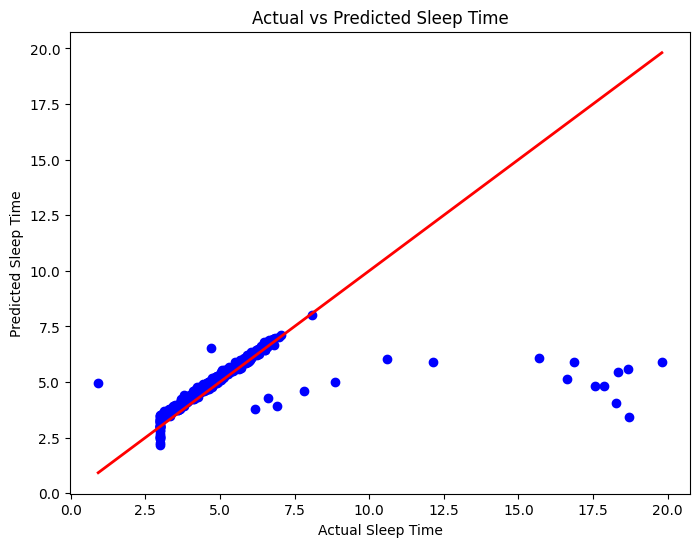

In [ ]:
#Build a Model from Scratch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Ensure the path is correct
df = pd.read_csv(dataset_path)

# 2. Check for missing values
if df.isnull().sum().sum() > 0:
    print("Warning: Dataset contains missing values. Consider handling them before training.")

# 3. Set target column and features
target_column = 'SleepTime'  # Replace with the actual column name
y = df[target_column]
X = df.drop(columns=[target_column])

# 4. Standardize features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Initialize Linear Regression model
linreg = LinearRegression()

# 7. Train the model
linreg.fit(X_train, y_train)

# 8. Predict on the training and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# 9. Evaluate the model performance

# Training set performance
mse_train = mean_squared_error(y_train, y_train_pred)
print(f'Mean Squared Error (Train): {mse_train}')

r2_train = r2_score(y_train, y_train_pred)
print(f'R-squared (Train): {r2_train}')

# Test set performance
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error (Test): {mse_test}')

r2_test = r2_score(y_test, y_test_pred)
print(f'R-squared (Test): {r2_test}')

# 10. Visualize the results (Actual vs Predicted values)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Sleep Time')
plt.xlabel('Actual Sleep Time')
plt.ylabel('Predicted Sleep Time')
plt.show()


In [ ]:
#Build a Primary Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
dataset_path = r'/content/drive/MyDrive/sleeptime_prediction_dataset.csv'  # Ensure the path is correct
df = pd.read_csv(dataset_path)

# Set target column and features
target_column = 'SleepTime'  # Replace with the actual column name
y = df[target_column]
X = df.drop(columns=[target_column])

# Standardize features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check if the split is successful
print(f"Training set size: {X_train.shape}, Test set size: {X_test.shape}")


Training set size: (1600, 6), Test set size: (400, 6)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Build Linear Regression model
linreg_model = LinearRegression()

# Build Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train both models
linreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using both models
y_pred_linreg = linreg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Linear Regression model
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
rmse_linreg = np.sqrt(mean_squared_error(y_test, y_pred_linreg))
r2_linreg = r2_score(y_test, y_pred_linreg)

print(f"Linear Regression - MAE: {mae_linreg}, RMSE: {rmse_linreg}, R2: {r2_linreg}")

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}, R2: {r2_rf}")


Linear Regression - MAE: 0.6393581402484603, RMSE: 2.1208119100504166, R2: 0.2055360110799379
Random Forest - MAE: 0.7904937499999997, RMSE: 2.241535390379773, R2: 0.11251482031807092


In [ ]:
# Compare models based on R2 score and other metrics
if r2_linreg > r2_rf:
    best_model = "Linear Regression"
    justification = "Linear Regression performed better based on the R2 score, indicating it explained more variance in the target variable."
else:
    best_model = "Random Forest"
    justification = "Random Forest performed better based on the R2 score, showing it handled the non-linear relationships better."

print(f"Best Model: {best_model}")
print(f"Justification: {justification}")


Best Model: Linear Regression
Justification: Linear Regression performed better based on the R2 score, indicating it explained more variance in the target variable.


In [ ]:
# Hyperparameters for Linear Regression
# Linear Regression in scikit-learn doesn't have many hyperparameters to tune.
# A commonly tuned hyperparameter for Linear Regression is the fit_intercept, which controls whether to calculate the intercept.
# It’s also worth noting that the normalize parameter was deprecated in recent versions.

# Hyperparameters for Random Forest Regressor
# The key hyperparameters for Random Forest Regressor are:
# - n_estimators: Number of trees in the forest.
# - max_depth: Maximum depth of the tree.
# - min_samples_split: Minimum number of samples required to split a node.
# - min_samples_leaf: Minimum number of samples required to be at a leaf node.
# - max_features: Number of features to consider when looking for the best split.

print("Hyperparameters for Linear Regression:")
print("1. fit_intercept: Boolean, default=True - Whether to calculate the intercept or not.")
print("\nHyperparameters for Random Forest Regressor:")
print("1. n_estimators: Integer, default=100 - The number of trees in the forest.")
print("2. max_depth: Integer or None, default=None - The maximum depth of the tree.")
print("3. min_samples_split: Integer, default=2 - The minimum number of samples required to split a node.")
print("4. min_samples_leaf: Integer, default=1 - The minimum number of samples required to be at a leaf node.")
print("5. max_features: Integer, float, or 'auto', default=None - The number of features to consider for the best split.")


Hyperparameters for Linear Regression:
1. fit_intercept: Boolean, default=True - Whether to calculate the intercept or not.

Hyperparameters for Random Forest Regressor:
1. n_estimators: Integer, default=100 - The number of trees in the forest.
2. max_depth: Integer or None, default=None - The maximum depth of the tree.
3. min_samples_split: Integer, default=2 - The minimum number of samples required to split a node.
4. min_samples_leaf: Integer, default=1 - The minimum number of samples required to be at a leaf node.
5. max_features: Integer, float, or 'auto', default=None - The number of features to consider for the best split.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define hyperparameter grids for both models

# Hyperparameter grid for Linear Regression
param_grid_linreg = {
    'fit_intercept': [True, False]
}

# Hyperparameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Example data (X_train, y_train should be defined with your training data)
# For demonstration purposes, let's generate some random data
X_train = np.random.rand(100, 10)  # 100 samples, 10 features
y_train = np.random.rand(100)      # 100 target values

# Check for NaN values in the data
if np.any(np.isnan(X_train)) or np.any(np.isnan(y_train)):
    print("Warning: NaN values found in the data.")
else:
    print("Data is clean (no NaN values).")

# Apply GridSearchCV for Linear Regression
grid_search_linreg = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid_linreg, cv=5, verbose=2)
grid_search_linreg.fit(X_train, y_train)

# Apply GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, cv=5, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Output the best parameters
print("\nBest Hyperparameters for Linear Regression:", grid_search_linreg.best_params_)
print("Best Hyperparameters for Random Forest Regressor:", grid_search_rf.best_params_)


Data is clean (no NaN values).
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END .................................fit_intercept=True; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
[CV] END ................................fit_intercept=False; total time=   0.0s
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_featur

In [ ]:
c

          Feature       Score
4  CaffeineIntake  912.036245
2       PhoneTime   35.043649
3       WorkHours   25.157233
0     WorkoutTime   13.823920
5  RelaxationTime   10.124635
1     ReadingTime    3.317663
Top 5 Selected Features based on Chi-Square test:
          Feature       Score
4  CaffeineIntake  912.036245
2       PhoneTime   35.043649
3       WorkHours   25.157233
0     WorkoutTime   13.823920
5  RelaxationTime   10.124635


In [ ]:
#Final Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable into numeric labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Transform categories into numbers

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Rebuild Linear Regression model
linreg = LinearRegression(fit_intercept=True)
linreg.fit(X_train, y_train)

# Rebuild Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_linreg = linreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluation metrics without inverse_transform
mae_linreg = mean_absolute_error(y_test, y_pred_linreg)
mse_linreg = mean_squared_error(y_test, y_pred_linreg)
r2_linreg = r2_score(y_test, y_pred_linreg)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation results
print("Linear Regression Performance:")
print(f"MAE: {mae_linreg}")
print(f"MSE: {mse_linreg}")
print(f"R-squared: {r2_linreg}")

print("\nRandom Forest Regressor Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Conclusion based on the best model
if r2_linreg > r2_rf:
    best_model = "Linear Regression"
    best_r2 = r2_linreg
else:
    best_model = "Random Forest Regressor"
    best_r2 = r2_rf

print(f"\nBest Performing Model: {best_model}")
print(f"Best R-squared: {best_r2}")


Linear Regression Performance:
MAE: 0.11085172468787906
MSE: 0.057126421715458175
R-squared: 0.005524156841115735

Random Forest Regressor Performance:
MAE: 0.08010510855918777
MSE: 0.05068320009106822
R-squared: 0.11768991246100391

Best Performing Model: Random Forest Regressor
Best R-squared: 0.11768991246100391


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_csv("/content/sleeptime_prediction_dataset.csv")


X = df.drop(columns=['SleepTime'])
y = df['SleepTime']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.theta) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / len(y)) * np.dot(X.T, (y_predicted - y))
            db = (1 / len(y)) * np.sum(y_predicted - y)

            self.theta -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.theta) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Train Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch(lr=0.01, epochs=1000)
log_reg_scratch.fit(X_train_scaled, y_train)
y_pred_log_scratch = log_reg_scratch.predict(X_test_scaled)

# Train Decision Tree Classifier
# Convert 'sleeptime' into discrete categories
df['sleeptime_category'] = pd.cut(df['SleepTime'], bins=[0, 4, 6, np.inf], labels=['Short', 'Medium', 'Long'])

# Convert category labels to numbers (0,1,2)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sleeptime_category'] = label_encoder.fit_transform(df['sleeptime_category'])  # 'Short' -> 0, 'Medium' -> 1, 'Long' -> 2

# Define X (features) and y (target)
X = df.drop(columns=['SleepTime', 'sleeptime_category'])  # Drop the original continuous column
y = df['sleeptime_category'].astype(int)  # Ensure target is integer

# Verify the y values
print(y.unique())  # Should output [0, 1, 2]
print(y.dtype)  # Should be 'int'

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final Check Before Training
print(y_train.unique())  # This MUST output discrete integers like [0, 1, 2]
print(y_train.dtype)  # Should be int




decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Train Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}\n")

# Evaluate all models
evaluate_model(y_test, y_pred_log_scratch, "Logistic Regression (Scratch)")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, "Random Forest")


[2 1 0]
int64
[2 1 0]
int64
Logistic Regression (Scratch) Performance:
Accuracy: 0.5625
Precision: 0.3164
Recall: 0.5625
F1 Score: 0.4050

Decision Tree Performance:
Accuracy: 0.7700
Precision: 0.7694
Recall: 0.7700
F1 Score: 0.7696

Random Forest Performance:
Accuracy: 0.8600
Precision: 0.8653
Recall: 0.8600
F1 Score: 0.8519



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import numpy as np
df = pd.read_csv("/content/sleeptime_prediction_dataset.csv")

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.weights) + self.bias  # Linear Equation

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example Usage:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Assuming 'df' is your dataframe and 'target' is the target column
X = df.drop(columns=['SleepTime']).values
y = df['SleepTime'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = LinearRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance (MSE)
mse = np.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.49792516247328
